In [2441]:
# Import required dependencies
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2442]:
# load data that we will use for analysis.
# for now we are going to load Company and funding data related to companies.
# Mapping data for sectors we will load when its required.

In [2443]:
companies = pd.read_csv("companies.txt",sep="\t", encoding="ISO-8859-1")

In [2444]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2445]:
companies.count()

permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64

In [2446]:
rounds2 = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")

In [2447]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2448]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [2449]:
# Count unique companies from Round2 table.
# To find unique elements in a column we need to first convert it to either lower or upper case and 
# find uique values out of it as an array and count number of records.
# To keep data uniform better to keep data in lower/upper case in both company and round tables.

In [2450]:
companies["permalink"] = companies["permalink"].str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [2451]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2452]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [2453]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2454]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [2455]:
# To find unique values in column we have converted the data to lower case.
# There are 2 methonds to find unique values which i found easy.
# 1. use inbuilt method unique() which returns an array and then find size of it.
# 2. get column data in set. set can contain only unique iteams and such that it will remove all duplicates.

In [2456]:
# Using first method - unique()

In [2457]:
rounds2["company_permalink"].unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [2458]:
rounds2["company_permalink"].unique().size

66370

In [2459]:
companies["permalink"].unique().size

66368

In [2460]:
# Using second method - Set data structure

In [2461]:
setCompanyId = set(companies["permalink"])
len(setCompanyId)

66368

In [2462]:
setRoundCompany = set(rounds2["company_permalink"])
len(setRoundCompany)

66370

In [2463]:
# To check the data difference between 2 similar columns we can use set which is already available from above step.
# find all data which are present in both columns and then negate it. This will five you all records which are present
# in one column bot not in other.

In [2464]:
rounds2[(~rounds2["company_permalink"].isin(setCompanyId))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [2465]:
# To work on single table we need to combine data from multiple tables/Data frames. 
# To do so we need to merge data from different tables to single table/dataframe.

In [2466]:
master_frame = pd.merge(rounds2,companies,how="left",left_on=["company_permalink"],right_on=["permalink"])
master_frame.shape

(114949, 16)

In [2467]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [2468]:
# after merge, it combines all the columns(features) from both the tables. 
# There are some columns which are there for details but not useful for our analytics.
# We can remove those columns from the tables as it is not going to affect anything.
# Columns to be removed - homepage_url,status,state_code,region,city,founded_at

In [2469]:
master_frame = master_frame.drop(["homepage_url","status","state_code","region","city","founded_at","funded_at"],axis=1)

In [2470]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10000000.0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2000000.0,/organization/0-6-com,0-6.com,Curated Web,CHN


In [2471]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
category_list              111535 non-null object
country_code               106271 non-null object
dtypes: float64(1), object(8)
memory usage: 8.8+ MB


In [2472]:
# We have to deal with all the companies whose funding type is either venture or seed or angel or private_equity.
# So filter out data based on funding type.

In [2473]:
funding_round_type_list = ["venture","seed","angel","private_equity"]
master_frame["funding_round_type"] = master_frame["funding_round_type"].str.lower()

In [2474]:
master_frame = master_frame[(master_frame.funding_round_type.isin(funding_round_type_list))]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10000000.0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2000000.0,/organization/0-6-com,0-6.com,Curated Web,CHN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,NaN,/organization/004-technologies,004 Technologies,Software,USA
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,3000000.0,/organization/0xdata,H2O.ai,Analytics,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20000000.0,/organization/0xdata,H2O.ai,Analytics,USA


In [2475]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 114947
Data columns (total 9 columns):
company_permalink          94397 non-null object
funding_round_permalink    94397 non-null object
funding_round_type         94397 non-null object
funding_round_code         31120 non-null object
raised_amount_usd          80627 non-null float64
permalink                  94390 non-null object
name                       94389 non-null object
category_list              91896 non-null object
country_code               87076 non-null object
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


In [2476]:
# I am using mean to get most representative value of the investment amount.
# There are so many records which has NaN(Not a Number) as value.
# we need to remove this kind of records from data frame.

In [2477]:
# first lets check by keeping NaN records.

In [2478]:
funding_round_type_group = master_frame.groupby("funding_round_type")
funding_round_type_group["raised_amount_usd"].mean()

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.198180e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

In [2479]:
# We are dealing with millions so lets convert raised amount to millions only, 
# such that the aggregate value wont be in sci number.

In [2480]:
#master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"]/1000000
master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].apply(lambda x: x/1000000)

In [2481]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,0.700000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,NaN,/organization/004-technologies,004 Technologies,Software,USA
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,3.000000,/organization/0xdata,H2O.ai,Analytics,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA


In [2482]:

funding_round_type_group1 = master_frame.groupby("funding_round_type")
funding_round_type_group1["raised_amount_usd"].mean()

funding_round_type
angel              0.958694
private_equity    73.308593
seed               0.719818
venture           11.748949
Name: raised_amount_usd, dtype: float64

In [2483]:
funding_round_type_group1["raised_amount_usd"].median()

funding_round_type
angel              0.400
private_equity    20.000
seed               0.275
venture            5.000
Name: raised_amount_usd, dtype: float64

In [2484]:
# Now lets remove NaN records and check the aggregation values.

In [2485]:
master_frame = master_frame[mp.isfinite(master_frame["raised_amount_usd"])]

In [2486]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,0.700000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN


In [2487]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 9 columns):
company_permalink          80627 non-null object
funding_round_permalink    80627 non-null object
funding_round_type         80627 non-null object
funding_round_code         28153 non-null object
raised_amount_usd          80627 non-null float64
permalink                  80626 non-null object
name                       80625 non-null object
category_list              79771 non-null object
country_code               75606 non-null object
dtypes: float64(1), object(8)
memory usage: 6.2+ MB


In [2488]:
funding_round_type_group2 = master_frame.groupby("funding_round_type")
funding_round_type_group2["raised_amount_usd"].mean()

funding_round_type
angel              0.958694
private_equity    73.308593
seed               0.719818
venture           11.748949
Name: raised_amount_usd, dtype: float64

In [2489]:
funding_round_type_group2["raised_amount_usd"].median()

funding_round_type
angel              0.400
private_equity    20.000
seed               0.275
venture            5.000
Name: raised_amount_usd, dtype: float64

In [2490]:
funding_round_type_group3 = master_frame.groupby(["funding_round_type"])
funding_round_type_group3["raised_amount_usd"].mean()

funding_round_type
angel              0.958694
private_equity    73.308593
seed               0.719818
venture           11.748949
Name: raised_amount_usd, dtype: float64

In [2491]:
funding_round_type_group4 = master_frame.groupby(["funding_round_type"])
funding_round_type_group4["raised_amount_usd"].sum()

funding_round_type
angel               4659.255123
private_equity    141925.436105
seed               16989.864181
venture           590126.216876
Name: raised_amount_usd, dtype: float64

In [2492]:
funding_round_type_group5 = master_frame.groupby(["funding_round_type","funding_round_code","company_permalink"])
funding_round_type_group5["raised_amount_usd"].mean()

funding_round_type  funding_round_code  company_permalink                              
angel               A                   /organization/compareit4me                           0.300000
                                        /organization/edaixi                                 3.200000
                                        /organization/endeavor-commerce                      0.500000
                                        /organization/flexreceipts                           1.400000
                                        /organization/knot-standard                          1.600000
                                        /organization/maestrano                              1.303014
                                        /organization/myrefers                               0.400000
                                        /organization/onlinetyari-com                        0.750000
                                        /organization/onovative                              0.4

In [2493]:
# As we can see from above mean value, the NaN value is not affecting aggregation value.
# What i assume is that aggregation simply ignores NaN values from records.

In [2494]:
# From above mean analysis we can say Vensure is the one in which a company has to invest based on mean investment
# and number of investment rounds + number of companies has invested per round + total investment.

In [2495]:
master_frame = master_frame[(master_frame.funding_round_type == "venture")]

In [2496]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA


In [2497]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 9 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funding_round_code         28043 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
category_list              49726 non-null object
country_code               48111 non-null object
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [2498]:
#master_frame["country_code"] = master_frame["country_code"].str.upper()
master_frame["country_code"] = master_frame["country_code"].apply(lambda x: str(x).upper())

C:\Users\i325429\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [2499]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NAN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA


In [2500]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 9 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funding_round_code         28043 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
category_list              49726 non-null object
country_code               50228 non-null object
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [2501]:
# To get contry wise total investment we need to add the investment after groupby on country and sort them in descending order.

In [2502]:
top9 = master_frame.groupby("country_code").agg({"raised_amount_usd":"sum"}).reset_index().rename(columns={"raised_amount_usd":"total_invest"})
#top_contries = top_contries_group["raised_amount_usd"].sum().sort_values(ascending=False)
top9 = top9.sort_values("total_invest",ascending=False).head(9)
top9

,country_code,total_invest
95,USA,422510.842796
15,CHN,39835.418773
66,NAN,25506.108414
29,GBR,20245.627416
39,IND,14391.858718
12,CAN,9583.332317
28,FRA,7259.536732
42,ISR,6907.514579
21,DEU,6346.959822


In [2503]:
# Your top english speaking contries are - USA - United States, GBR - United Kingdom, IND - india

In [2504]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NAN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA


In [2505]:
# Now we need to get Prim category from category_list column.
# To do so we need to tokenize the string and get first value from String array after tokenizing.

In [2506]:
master_frame["primary sector"] = master_frame["category_list"].str.split("|",n=1,expand=True)[0]

C:\Users\i325429\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [2507]:
master_frame["primary sector"] = master_frame["primary sector"].apply(lambda x: str(x).lower())

C:\Users\i325429\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [2508]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND,media
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NAN,apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN,curated web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA,analytics


In [2509]:
# Now we need to bind the prim category with its respective sector.
# For this we need mapping data of category to sector and merge it with our master table.

In [2510]:
mapping = pd.read_csv("mapping.csv",encoding="ISO-8859-1")

In [2511]:
mapping.head()


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [2512]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [2513]:
# We need to combine sector columns into one for category to sector mapping.
# For that we have created "main_sector" column which has column name as value and mapped to category_list 
# column whenever there is 1 in one of the 8 main sector columns in mapping file.

In [2514]:
# if the category is mapped to multiple sector then we are considering last column which has 1 for same category.

In [2515]:
conditions = [mapping["Automotive & Sports"] == 1,
             mapping["Cleantech / Semiconductors"] == 1,
             mapping["Entertainment"] == 1,
             mapping["Health"] == 1,
             mapping["Manufacturing"] == 1,
             mapping["News, Search and Messaging"] == 1,
             mapping["Others"] == 1,
             mapping["Social, Finance, Analytics, Advertising"] == 1]
choices = ["Automotive & Sports","Cleantech / Semiconductors","Entertainment","Health","Manufacturing","News, Search and Messaging","Others","Social, Finance, Analytics, Advertising"]

In [2516]:
mapping["main_sector"] = mp.select(conditions, choices, default='blank')
mapping = mapping.rename(columns={"category_list":"mapping_category_list"})
mapping["mapping_category_list"] = mapping["mapping_category_list"].apply(lambda x: str(x).lower())

In [2517]:
# There are some columns which are there for details but not useful for our analytics after calculationg main_sector.
# We can remove those columns from the tables as it is not going to affect anything.
# Columns to be removed - 
# Automotive & Sports, Blanks, Cleantech / Semiconductors, Entertainment, Health, Manufacturing, News, Search and Messaging, Others, Social, Finance, Analytics, Advertising

In [2518]:
mapping = mapping.drop(["Automotive & Sports", "Blanks", "Cleantech / Semiconductors", "Entertainment", "Health", "Manufacturing", "News, Search and Messaging", "Others", "Social, Finance, Analytics, Advertising"],axis=1)

In [2519]:
mapping.head()

,mapping_category_list,main_sector
0,nan,blank
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"


In [2520]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 2 columns):
mapping_category_list    688 non-null object
main_sector              688 non-null object
dtypes: object(2)
memory usage: 10.8+ KB


In [2521]:
master_frame = pd.merge(master_frame, mapping, how="left",left_on="primary sector",right_on="mapping_category_list")
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND,media,media,Entertainment
1,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NAN,apps,apps,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN,curated web,curated web,"News, Search and Messaging"
3,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,20.000000,/organization/0xdata,H2O.ai,Analytics,USA,analytics,NaN,NaN
5,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,1.700000,/organization/0xdata,H2O.ai,Analytics,USA,analytics,NaN,NaN
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,8.900000,/organization/0xdata,H2O.ai,Analytics,USA,analytics,NaN,NaN
7,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,5.000000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,apps,apps,"News, Search and Messaging"
8,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,4.000000,/organization/10-minutes-with,10 Minutes With,Education,GBR,education,education,Others
9,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,2.520000,/organization/1000memories,1000memories,Curated Web,USA,curated web,curated web,"News, Search and Messaging"


In [2522]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 50227
Data columns (total 12 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funding_round_code         28043 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
category_list              49726 non-null object
country_code               50228 non-null object
primary sector             50228 non-null object
mapping_category_list      47025 non-null object
main_sector                47025 non-null object
dtypes: float64(1), object(11)
memory usage: 5.0+ MB


In [2523]:
# lets create dataframe based on contries and get total number of investments and total investment sum in USD.
country_code_list = ["USA", "GBR", "IND"]

In [2524]:
D1 = master_frame[master_frame.country_code == "USA"]

In [2525]:
# There are some columns which dont have sectors associated with it.
# we will remove those columns as we are focusing on 8 main categories.

In [2526]:
D1 = D1[(pd.notnull(D1.main_sector))]
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector
7,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,5.000000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,apps,apps,"News, Search and Messaging"
9,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,2.520000,/organization/1000memories,1000memories,Curated Web,USA,curated web,curated web,"News, Search and Messaging"
10,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,0.265940,/organization/1000museums-com,1000museums.com,Curated Web,USA,curated web,curated web,"News, Search and Messaging"
11,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,NaN,2.906832,/organization/1000museums-com,1000museums.com,Curated Web,USA,curated web,curated web,"News, Search and Messaging"
12,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,1.500000,/organization/1000museums-com,1000museums.com,Curated Web,USA,curated web,curated web,"News, Search and Messaging"
13,/organization/1000museums-com,/funding-round/fd1b3064232ba9b3cfb5653a619e82e8,venture,NaN,0.642000,/organization/1000museums-com,1000museums.com,Curated Web,USA,curated web,curated web,"News, Search and Messaging"
22,/organization/100health,/funding-round/502f558bee350299fd1ae503e5b9a124,venture,A,3.530000,/organization/100health,Redox,Health Care|Health Care Information Technology...,USA,health care,health care,Health
24,/organization/1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,NaN,35.000000,/organization/1010data,1010data,Software,USA,software,software,Others
25,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,55.000000,/organization/10x-genomics,10X Genomics,Biotechnology|Technology,USA,biotechnology,biotechnology,Cleantech / Semiconductors
26,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,0.550000,/organization/10x-technologies,10X Technologies,Biotechnology,USA,biotechnology,biotechnology,Cleantech / Semiconductors


In [2527]:
D1 = D1[(~(D1.main_sector == "blank"))]
D1.shape

(33526, 12)

In [2528]:
D11 = D1.groupby("main_sector").agg({'company_permalink':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={"company_permalink":"invest_count","raised_amount_usd":"invest_sum"})
D11.sort_values("invest_count",ascending=False)


,main_sector,invest_count,invest_sum
6,Others,8243,82084.578045
1,Cleantech / Semiconductors,7849,118764.441980
7,"Social, Finance, Analytics, Advertising",5156,62062.992808
5,"News, Search and Messaging",4301,44619.319292
3,Health,3263,31660.933966
4,Manufacturing,2453,24845.319470
2,Entertainment,1756,16567.831138
0,Automotive & Sports,505,11632.164696


In [2529]:
D1 = pd.merge(D1,D11,how="left",on="main_sector")
D1
D1["raised_amount_usd"].sum()

392237.581395

In [2530]:
D1["company_permalink"].count()

33526

In [2531]:
D1[(D1.main_sector == "Others")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
26948,/organization/social-finance,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,E,1000.0,/organization/social-finance,SoFi,Education|Finance|Financial Services|Peer-to-Peer,USA,education,education,Others,8243,82084.578045
7402,/organization/coreexpress,/funding-round/cbdb1b4d8a6391e2338fc371ec9b97e0,venture,NaN,573.0,/organization/coreexpress,CoreExpress,Services,USA,services,services,Others,8243,82084.578045
33162,/organization/zenefits,/funding-round/2db96f511dc2de33b6edc7844b7c240c,venture,C,500.0,/organization/zenefits,Zenefits,Enterprise Software|Health and Insurance|Human...,USA,enterprise software,enterprise software,Others,8243,82084.578045
26874,/organization/snapchat,/funding-round/4a2de2da69d5ccaac8589108c8055e42,venture,D,485.0,/organization/snapchat,Snapchat,File Sharing|Messaging|Mobile|Photography,USA,file sharing,file sharing,Others,8243,82084.578045
16751,/organization/livingsocial,/funding-round/5c3bbce60473fdee90a52231099daa59,venture,E,400.0,/organization/livingsocial,LivingSocial,E-Commerce|Group Buying|Networking|Social Comm...,USA,e-commerce,e-commerce,Others,8243,82084.578045


In [2532]:
D1[(D1.main_sector == "Cleantech / Semiconductors")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
11319,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,17600.000000,/organization/freescale,Freescale Semiconductor,Semiconductors,USA,semiconductors,semiconductors,Cleantech / Semiconductors,7849,118764.44198
15443,/organization/juno-therapeutics,/funding-round/f93ba64f2e858105c47ee4901dc71d74,venture,NaN,849.803496,/organization/juno-therapeutics,Juno Therapeutics,Biotechnology|Health and Wellness|Health Care,USA,biotechnology,biotechnology,Cleantech / Semiconductors,7849,118764.44198
29080,/organization/tenaska,/funding-round/e1e86b41979e5cf6d144f7ef614d056d,venture,NaN,550.000000,/organization/tenaska,Tenaska,Energy,USA,energy,energy,Cleantech / Semiconductors,7849,118764.44198
12341,/organization/greatpoint-energy,/funding-round/10052412d43b77826e7f7cb57578da0f,venture,D,420.000000,/organization/greatpoint-energy,GreatPoint Energy,Clean Energy|Clean Technology,USA,clean energy,clean energy,Cleantech / Semiconductors,7849,118764.44198
23627,/organization/quantrx-biomedical,/funding-round/773952f16706442262e83b2f5cef9322,venture,NaN,406.039700,/organization/quantrx-biomedical,QuantRx Biomedical,Biotechnology,USA,biotechnology,biotechnology,Cleantech / Semiconductors,7849,118764.44198


In [2533]:
# lets create D2 dataframe based on contry - United Kingdom and get total number of investments and total investment sum in USD.

In [2534]:
D2 = master_frame[master_frame.country_code == "GBR"]

In [2535]:
# Clear null data

In [2536]:
D2 = D2[(pd.notnull(D2.main_sector))]
D2.shape

(1930, 12)

In [2537]:
D2 = D2[(~(D2.main_sector == "blank"))]
D2.shape


(1916, 12)

In [2538]:
D2["raised_amount_usd"].sum()

18924.390319000002

In [2539]:
D2["company_permalink"].count()

1916

In [2540]:
D21 = D2.groupby("main_sector").agg({'company_permalink':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={"company_permalink":"invest_count","raised_amount_usd":"invest_sum"})
D21.sort_values("invest_count",ascending=False)

,main_sector,invest_count,invest_sum
6,Others,507,4400.423043
1,Cleantech / Semiconductors,433,5028.729267
7,"Social, Finance, Analytics, Advertising",318,2851.116278
5,"News, Search and Messaging",241,2956.023749
2,Entertainment,133,1141.281250
4,Manufacturing,122,1019.283214
3,Health,118,1046.654806
0,Automotive & Sports,44,480.878712


In [2541]:
D2 = pd.merge(D2,D21,how="left",on="main_sector")
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
0,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,4.000000,/organization/10-minutes-with,10 Minutes With,Education,GBR,education,education,Others,507,4400.423043
1,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,B,2.274716,/organization/31dover,31Dover,E-Commerce|Wine And Spirits,GBR,e-commerce,e-commerce,Others,507,4400.423043
2,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,5.500000,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,android,android,"Social, Finance, Analytics, Advertising",318,2851.116278
3,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,A,1.200000,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,android,android,"Social, Finance, Analytics, Advertising",318,2851.116278
4,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,NaN,15.152514,/organization/3sun,3sun,Clean Technology,GBR,clean technology,clean technology,Cleantech / Semiconductors,433,5028.729267
5,/organization/4th-office,/funding-round/cb31013634b75ce3fd5f58de0c30ec6e,venture,B,3.607956,/organization/4th-office,4th Office,Office Space,GBR,office space,office space,Others,507,4400.423043
6,/organization/60mo,/funding-round/a6d521005229961ab858d840d9c80408,venture,A,1.000000,/organization/60mo,60mo,Accounting|Business Development|Finance|Softwa...,GBR,accounting,accounting,"Social, Finance, Analytics, Advertising",318,2851.116278
7,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,8.468328,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,content creators,content creators,Entertainment,133,1141.281250
8,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,10.000000,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,content creators,content creators,Entertainment,133,1141.281250
9,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,15.000000,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment,133,1141.281250


In [2542]:
D2[(D2.main_sector == "Others")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
1180,/organization/oneweb,/funding-round/0a9a5d2d5b49ac05b926325cbbbcfb49,venture,A,500.000000,/organization/oneweb,OneWeb,Technology,GBR,technology,technology,Others,507,4400.423043
906,/organization/liquid-telecom,/funding-round/9e4b34f81eca1b2d1d76432fa32414ce,venture,NaN,150.000000,/organization/liquid-telecom,Liquid Telecom,Telecommunications,GBR,telecommunications,telecommunications,Others,507,4400.423043
1550,/organization/six-degrees-group,/funding-round/740244296674824e171842a8c5cf99b4,venture,A,93.863505,/organization/six-degrees-group,Six Degrees Group,Web Hosting,GBR,web hosting,web hosting,Others,507,4400.423043
580,/organization/farfetch,/funding-round/9f4452e163e7c950728feb9a0f4592e2,venture,E,86.000000,/organization/farfetch,Farfetch,E-Commerce|Fashion,GBR,e-commerce,e-commerce,Others,507,4400.423043
581,/organization/farfetch,/funding-round/d26dea731c7a47f5d0ce7754b1609001,venture,D,66.000000,/organization/farfetch,Farfetch,E-Commerce|Fashion,GBR,e-commerce,e-commerce,Others,507,4400.423043


In [2543]:
D2[(D2.main_sector == "Cleantech / Semiconductors")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
766,/organization/immunocore,/funding-round/6159299c71ab84032910b48ceed406cf,venture,NaN,320.000000,/organization/immunocore,Immunocore,Biotechnology|Market Research,GBR,biotechnology,biotechnology,Cleantech / Semiconductors,433,5028.729267
1425,/organization/reneuron-group,/funding-round/2ac44d51d1f21f4002249a41111c260c,venture,NaN,105.148268,/organization/reneuron-group,ReNeuron Group,Biotechnology,GBR,biotechnology,biotechnology,Cleantech / Semiconductors,433,5028.729267
34,/organization/adaptimmune,/funding-round/663f4223e4f1fabee76abe90dcda2795,venture,A,104.000000,/organization/adaptimmune,Adaptimmune,Biotechnology,GBR,biotechnology,biotechnology,Cleantech / Semiconductors,433,5028.729267
110,/organization/archimedes-pharma,/funding-round/c4efd7401c2e464890862cc9887bd2f1,venture,C,99.000000,/organization/archimedes-pharma,Archimedes Pharma,Biotechnology,GBR,biotechnology,biotechnology,Cleantech / Semiconductors,433,5028.729267
335,/organization/circassia,/funding-round/1ae53442fa2f5c3f0364b5961198fbca,venture,D,98.000000,/organization/circassia,Circassia,Biotechnology,GBR,biotechnology,biotechnology,Cleantech / Semiconductors,433,5028.729267


In [2544]:
# lets create D3 dataframe based on contry - India and get total number of investments and total investment sum in USD.

In [2545]:
D3 = master_frame[master_frame.country_code == "IND"]
D3 = D3[(pd.notnull(D3.main_sector))]

In [2546]:
D3 = D3[(~(D3.main_sector == "blank"))]
D3.shape

(745, 12)

In [2547]:
D31 = D3.groupby("main_sector").agg({'company_permalink':'count', 'raised_amount_usd': 'sum'}).reset_index().rename(columns={"company_permalink":"invest_count","raised_amount_usd":"invest_sum"})
D31.sort_values("invest_count",ascending=False)

,main_sector,invest_count,invest_sum
6,Others,281,6318.507440
5,"News, Search and Messaging",130,1739.579948
7,"Social, Finance, Analytics, Advertising",77,866.763870
2,Entertainment,75,975.705344
4,Manufacturing,55,730.260000
1,Cleantech / Semiconductors,54,786.444633
3,Health,42,564.370000
0,Automotive & Sports,31,1556.350000


In [2548]:
D3["raised_amount_usd"].sum()

13537.981235

In [2549]:
D3["company_permalink"].count()

745

In [2550]:
D3 = pd.merge(D3,D31,how="left",on="main_sector")
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,10.000000,/organization/-fame,#fame,Media,IND,media,media,Entertainment,75,975.705344
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,6.369507,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,e-commerce,e-commerce,Others,281,6318.507440
2,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,4.000000,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,edtech,edtech,Others,281,6318.507440
3,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,1.240000,/organization/3dsoc,3DSoC,3D|Mobile,IND,3d,3d,Manufacturing,55,730.260000
4,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,0.825000,/organization/3dsoc,3DSoC,3D|Mobile,IND,3d,3d,Manufacturing,55,730.260000
5,/organization/acb-india-limited,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,C,25.090000,/organization/acb-india-limited,ACB (India) Limited,Energy|Mining Technologies,IND,energy,energy,Cleantech / Semiconductors,54,786.444633
6,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,8.180000,/organization/adlabs-imagica,Adlabs Imagica,Entertainment|Tourism,IND,entertainment,entertainment,Entertainment,75,975.705344
7,/organization/agrostar,/funding-round/7f12c8c8e24c3629d89f23e99168f8be,venture,NaN,4.000000,/organization/agrostar,Agrostar,E-Commerce,IND,e-commerce,e-commerce,Others,281,6318.507440
8,/organization/akosha,/funding-round/3d88f3874ff8e90bab6c2ea837fd33d6,venture,B,16.000000,/organization/akosha,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,IND,consumer internet,consumer internet,"Social, Finance, Analytics, Advertising",77,866.763870
9,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,5.000000,/organization/akosha,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,IND,consumer internet,consumer internet,"Social, Finance, Analytics, Advertising",77,866.763870


In [2551]:
D3[(D3.main_sector == "Others")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
211,/organization/flipkart,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,G,1000.0,/organization/flipkart,Flipkart,E-Commerce|Online Shopping,IND,e-commerce,e-commerce,Others,281,6318.50744
215,/organization/flipkart,/funding-round/fc494b8372efe09ff4622d1b3940a44d,venture,H,700.0,/organization/flipkart,Flipkart,E-Commerce|Online Shopping,IND,e-commerce,e-commerce,Others,281,6318.50744
616,/organization/tata-teleservices,/funding-round/3de0fe717eba310239bbe06fd841cd72,venture,NaN,212.0,/organization/tata-teleservices,Tata Teleservices,Services|Telecommunications|Wireless,IND,services,services,Others,281,6318.50744
207,/organization/flipkart,/funding-round/0f95a3605ce19904851d6af4b31bd37f,venture,F,210.0,/organization/flipkart,Flipkart,E-Commerce|Online Shopping,IND,e-commerce,e-commerce,Others,281,6318.50744
208,/organization/flipkart,/funding-round/299d4ccf054fe9b04e96614c17d8a338,venture,E,200.0,/organization/flipkart,Flipkart,E-Commerce|Online Shopping,IND,e-commerce,e-commerce,Others,281,6318.50744


In [2552]:
D3[(D3.main_sector == "News, Search and Messaging")].sort_values("raised_amount_usd",ascending=False).head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd,permalink,name,category_list,country_code,primary sector,mapping_category_list,main_sector,invest_count,invest_sum
520,/organization/quikr-india,/funding-round/c3d8b1a4db1354d4c3dbc60a8171565f,venture,H,150.0,/organization/quikr-india,Quikr,Curated Web,IND,curated web,curated web,"News, Search and Messaging",130,1739.579948
521,/organization/quikr-india,/funding-round/ce9bc87569765200a4ba52d06071e466,venture,F,90.0,/organization/quikr-india,Quikr,Curated Web,IND,curated web,curated web,"News, Search and Messaging",130,1739.579948
221,/organization/freecharge,/funding-round/6584c8fed1cede9215e8d712a6534530,venture,C,80.0,/organization/freecharge,FreeCharge,Internet|Payments,IND,internet,internet,"News, Search and Messaging",130,1739.579948
259,/organization/hike,/funding-round/73d21a2875dbc2e1f9fef92aeac3b72a,venture,C,65.0,/organization/hike,hike,Messaging|Mobile,IND,messaging,messaging,"News, Search and Messaging",130,1739.579948
517,/organization/quikr-india,/funding-round/75d6aa7365247e6c23fe83220a40c9c4,venture,G,60.0,/organization/quikr-india,Quikr,Curated Web,IND,curated web,curated web,"News, Search and Messaging",130,1739.579948


In [2553]:
# lets get some meaningful insights using graph
#
#
#
#

In [2554]:
funding_round_type_list = ["venture","seed","angel","private_equity"]

In [2555]:
rounds2["funding_round_type"] = rounds2["funding_round_type"].str.lower()
rounds2 = rounds2[(rounds2.funding_round_type.isin(funding_round_type_list))]
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2556]:
rounds2["raised_amount_usd"] = rounds2["raised_amount_usd"].apply(lambda x: x/1000000)
rounds2["raised_amount_usd1"] = rounds2["raised_amount_usd"]

In [2557]:
total_raised_amount = rounds2.raised_amount_usd.sum()

In [2558]:
funding_type_df = rounds2.groupby("funding_round_type").agg({'raised_amount_usd':'mean','raised_amount_usd1':"sum"}).reset_index().rename(columns={"raised_amount_usd":"invest_mean","raised_amount_usd1":"invest_sum"})


In [2559]:
funding_type_df["invest_perc"] = funding_type_df["invest_sum"]/total_raised_amount *100
funding_type_df

,funding_round_type,invest_mean,invest_sum,invest_perc
0,angel,0.958694,4659.255123,0.618184
1,private_equity,73.308593,141925.436105,18.830475
2,seed,0.719818,16989.864181,2.254192
3,venture,11.748949,590126.216876,78.297149


Text(0,0.5,'Average Investment')

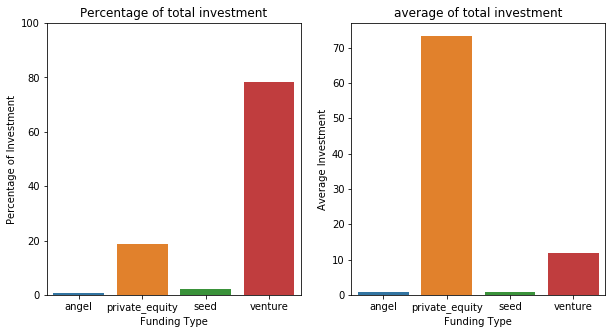

In [2560]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Percentage of total investment")
sns.barplot(x="funding_round_type", y="invest_perc",data=funding_type_df)
plt.xlabel("Funding Type")
plt.ylabel("Percentage of Investment")
plt.ylim(0,100)

plt.subplot(1,2,2)
plt.title("average of total investment")
sns.barplot(x="funding_round_type", y="invest_mean",data=funding_type_df)
plt.xlabel("Funding Type")
plt.ylabel("Average Investment")

In [2561]:
top9

,country_code,total_invest
95,USA,422510.842796
15,CHN,39835.418773
66,NAN,25506.108414
29,GBR,20245.627416
39,IND,14391.858718
12,CAN,9583.332317
28,FRA,7259.536732
42,ISR,6907.514579
21,DEU,6346.959822


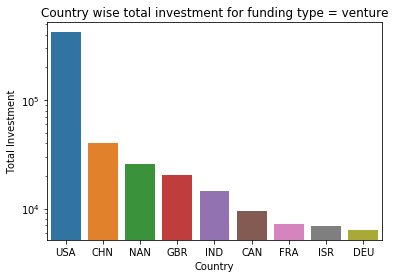

In [2562]:
plt.title("Country wise total investment for funding type = venture")
sns.barplot(x="country_code", y="total_invest",data=top9)
plt.xlabel("Country")
plt.ylabel("Total Investment")
plt.yscale("log")

In [2563]:
D12_Sectors = ["Others","Cleantech / Semiconductors","Social, Finance, Analytics, Advertising"] 
D3_Sectors = ["Others","News, Search and Messaging", "Social, Finance, Analytics, Advertising"]

D1 = D1[(D1.main_sector.isin(D12_Sectors))]
D2 = D2[(D2.main_sector.isin(D12_Sectors))]
D3 = D3[(D3.main_sector.isin(D3_Sectors))]

In [2564]:
D1.shape

(21248, 14)

In [2565]:
D2.shape

(1258, 14)

In [2566]:
D3.shape

(488, 14)

In [2567]:
top_contry_sector_df = D1.append(D2)
top_contry_sector_df = top_contry_sector_df.append(D3)


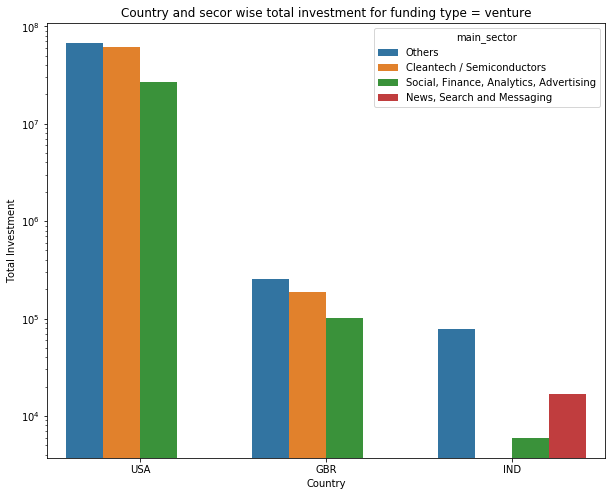

In [2568]:
plt.figure(figsize=(10,8))
plt.title("Country and secor wise total investment for funding type = venture")
sns.barplot(x="country_code", y="invest_count", hue="main_sector", data=top_contry_sector_df, estimator=mp.sum)
plt.xlabel("Country")
plt.ylabel("Total Investment")
plt.yscale("log")